In [1]:
import tensorflow as tf
from keras import models, layers ,datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train),(X_test, y_test)=datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [3]:
y_train=y_train.reshape(-1,)
y_test=y_test.reshape(-1,)

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

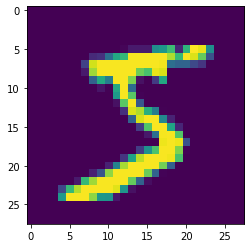

In [10]:
plt.imshow(X_train[0])

In [4]:
def show_image(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(y[index])

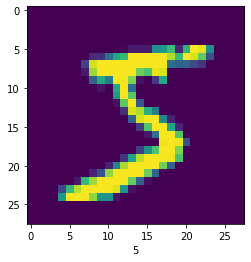

In [5]:
show_image(X_train,y_train,0)

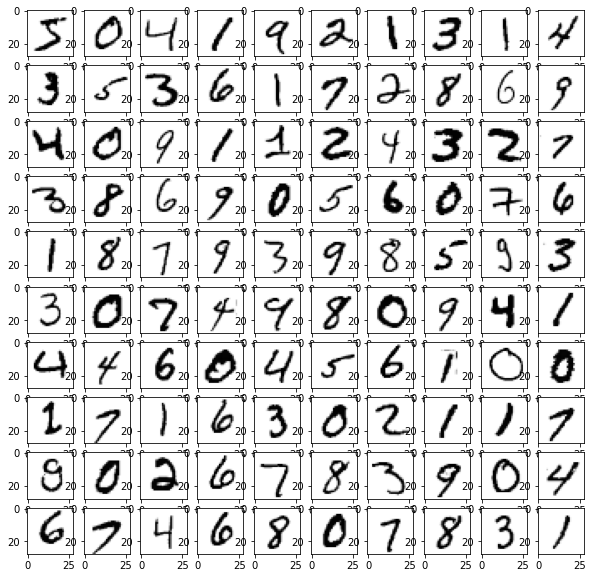

In [17]:
fig, ax = plt.subplots(10,10, figsize = (10,10))
axes = ax.flatten()
for i in range(100):
    
    axes[i].imshow(np.reshape(X_train[i], (28,28)), cmap="Greys")
plt.show()

In [6]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [24]:
ann=models.Sequential([
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
    
])

ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history=ann.fit(X_train,y_train,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.4226 - accuracy: 0.8782 - val_loss: 0.1187 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1048 - accuracy: 0.9683 - val_loss: 0.0922 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0977 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0504 - accuracy: 0.9846 - val_loss: 0.0763 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0387 - accuracy: 0.9879 - val_loss: 0.0825 - val_accuracy: 0.9746
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0819 - val_accuracy: 0.9762
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0876 - va

In [25]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1086 - accuracy: 0.9755


[0.10857399553060532, 0.9754999876022339]

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
y_pred=ann.predict(X_test)
y_pred=[np.argmax(element) for element in y_pred]
print("Classification report : \n",classification_report(y_test,y_pred))

Classification report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.95      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.99      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.94      0.99      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [9]:
def plot_learning_curve(history,epochs):
    epoch_range=range(1,epochs+1)
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['train','val'],loc='upper left')
    plt.show()
    
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['train','val'],loc='upper left')
    plt.show()

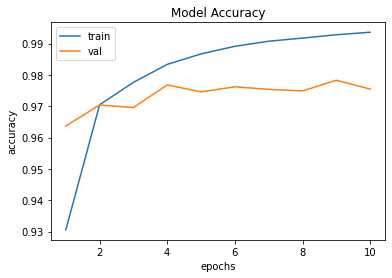

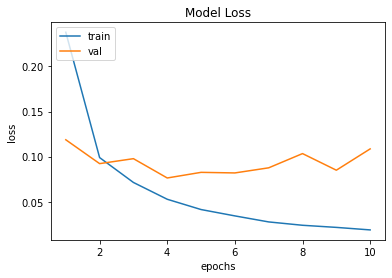

In [34]:
plot_learning_curve(history,10)

In [10]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])


cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

history_cnn=cnn.fit(X_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 73s 153ms/step - loss: 0.7439 - accuracy: 0.7521 - val_loss: 0.0633 - val_accuracy: 0.9792
Epoch 2/10
469/469 [==============================] - 79s 168ms/step - loss: 0.1193 - accuracy: 0.9638 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 3/10
469/469 [==============================] - 76s 162ms/step - loss: 0.0853 - accuracy: 0.9736 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 76s 163ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0381 - val_accuracy: 0.9865
Epoch 5/10
469/469 [==============================] - 77s 163ms/step - loss: 0.0594 - accuracy: 0.9823 - val_loss: 0.0305 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 81s 172ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.0266 - val_accuracy: 0.9909
Epoch 7/10
469/469 [==============================] - 90s 193ms/step - loss: 0.0462 - accuracy: 0.9864 - val_loss: 0.0250 - val_ac

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0268 - accuracy: 0.9909


[0.02679760754108429, 0.9908999800682068]

In [12]:
y_pred=cnn.predict(X_test)
y_pred=[np.argmax(element) for element in y_pred]
print("Classification report :\n",classification_report(y_test,y_pred))

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



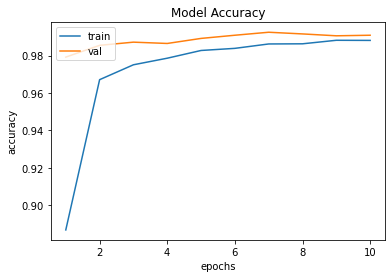

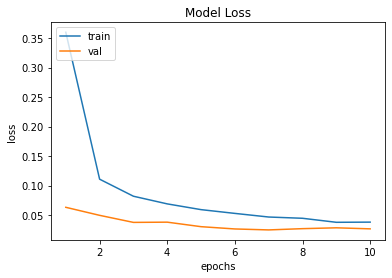

In [13]:
plot_learning_curve(history_cnn,10)

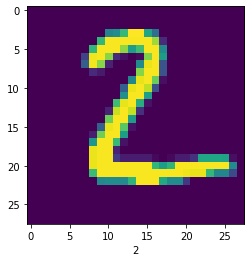

In [14]:
show_image(X_test,y_test,1)

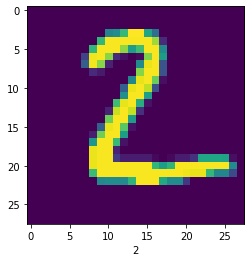

In [15]:
show_image(X_test,y_pred,1)